# Introduction

1.Took Data set from kaggle

2.I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.

3.Will be making prediction models using number of machine learning regression algorithms.

4.The objective of the study is to analyse the Car price to conduct various
 statistical hypothesis tests in order to get meaningful information
 from it. The 'Linear Regression' statistical algorithm would be used
 to train the dataset and predict a continuous target variable

5.A thorough study of the data will aid in the discovery of valuable
 insights that will be of enormous value to passengers

6.There are 60109 cleaned datapoints and 12 columns in the dataset.

Pandas - Used to analyse data. It has function for analysing,cleaning,exploring and manipulating data.

Numpy - Mostly work on numerical values for making Arithmatic Operations.

Matplotlib - Comprehensive library for creating static,animated and intractive visualization.

Seaborn - Seaborn is a python data visualization library based on matplotlib. It provides a high-level interface for drawing intractive and informative statastical graphics.

Warnings - warnings are provided to warn the developer of situation that are not necessarily exceptions and ignore them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("used_car_dataset.csv")
df

,Unnamed: 0,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,"6,000 km",2021.0,6525000.0,1490cc,Automatic
1,1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,"68,000 km",2012.0,1625000.0,1000cc,Manual
2,2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,"150,000 km",2015.0,2550000.0,1300cc,Automatic
3,3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,"18,000 km",2022.0,9000000.0,3500cc,Automatic
4,4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,"110,000 km",2015.0,3350000.0,1300cc,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
60104,60104,KIA,PKR,KIA Sportage 2022 for sale in Lahore,Petrol,used,KIA,10 km,2022.0,7900000.0,2000cc,Automatic
60105,60105,KIA,PKR,KIA Picanto 2022 for sale in Lahore,Petrol,used,KIA,10 km,2022.0,3350000.0,1000cc,Automatic
60106,60106,Suzuki,PKR,Suzuki Swift 2022 for sale in Lahore,Petrol,used,Suzuki,10 km,2022.0,4750000.0,1200cc,Automatic
60107,60107,Suzuki,PKR,Suzuki Wagon R 2018 for sale in Rawalpindi,Hybrid,used,Suzuki,"15,000 km",2018.0,3175000.0,660cc,Automatic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60109 entries, 0 to 60108
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60109 non-null  int64  
 1   brand                  60109 non-null  object 
 2   currency               60109 non-null  object 
 3   description            60109 non-null  object 
 4   fuel_type              60109 non-null  object 
 5   item_condition         60109 non-null  object 
 6   manufacturer           60109 non-null  object 
 7   mileage_from_odometer  60109 non-null  object 
 8   model_date             60109 non-null  float64
 9   price                  60109 non-null  float64
 10  vehicle_engine         60109 non-null  object 
 11  vehicle_transmission   60109 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.5+ MB


Drop Unwanted Columns from dataset which is not required for prediction.

In [4]:
df.drop(["Unnamed: 0","currency"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60109 entries, 0 to 60108
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  60109 non-null  object 
 1   description            60109 non-null  object 
 2   fuel_type              60109 non-null  object 
 3   item_condition         60109 non-null  object 
 4   manufacturer           60109 non-null  object 
 5   mileage_from_odometer  60109 non-null  object 
 6   model_date             60109 non-null  float64
 7   price                  60109 non-null  float64
 8   vehicle_engine         60109 non-null  object 
 9   vehicle_transmission   60109 non-null  object 
dtypes: float64(2), object(8)
memory usage: 4.6+ MB


#### Find null values in dataset.

In [5]:
df.isnull().sum()

brand                    0
description              0
fuel_type                0
item_condition           0
manufacturer             0
mileage_from_odometer    0
model_date               0
price                    0
vehicle_engine           0
vehicle_transmission     0
dtype: int64

#### Create a function to take a values count in the column,having datatype of object.

In [6]:
def valuecount(df):
    for i in df.select_dtypes("object").columns:
        print("======================")
        print(i)
        print("======================")
        print(df[i].value_counts())
        
valuecount(df)

brand
Toyota        19795
Suzuki        17709
Honda         11443
Daihatsu       2370
Nissan         1268
              ...  
Geely             1
Ferrari           1
Alfa Romeo        1
Morris            1
Volvo             1
Name: brand, Length: 71, dtype: int64
description
Toyota Corolla 2022 for sale in Karachi       188
Suzuki Alto 2022 for sale in Lahore           162
Suzuki Alto 2022 for sale in Karachi          153
Honda City 2023 for sale in Lahore            130
Toyota Yaris 2021 for sale in Lahore          125
                                             ... 
Suzuki Every 2010 for sale in Lahore            1
Suzuki Mehran 2013 for sale in Mansehra         1
Hyundai Santro 2009 for sale in Faisalabad      1
Suzuki Khyber 2000 for sale in Quetta           1
Lexus LX Series 2003 for sale in Lahore         1
Name: description, Length: 18347, dtype: int64
fuel_type
Petrol      53866
Diesel       3489
Hybrid       2115
CNG           523
Electric       88
Lpg            28
Name: fue

#### Change Datatype

In [7]:
df["mileage_from_odometer"] = df["mileage_from_odometer"].replace(r'[^0-9.]', '', regex=True)

In [8]:
df["mileage_from_odometer"]=df["mileage_from_odometer"].astype("int")

In [9]:
df["model_date"].astype(int).inplace=True

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60109 entries, 0 to 60108
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  60109 non-null  object 
 1   description            60109 non-null  object 
 2   fuel_type              60109 non-null  object 
 3   item_condition         60109 non-null  object 
 4   manufacturer           60109 non-null  object 
 5   mileage_from_odometer  60109 non-null  int32  
 6   model_date             60109 non-null  float64
 7   price                  60109 non-null  float64
 8   vehicle_engine         60109 non-null  object 
 9   vehicle_transmission   60109 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 4.4+ MB


#### Below piechart shows percentages of Automatic and  Manual distribution of vehicle_transmission

In [11]:
df["vehicle_transmission"].value_counts()

Automatic    30728
Manual       29381
Name: vehicle_transmission, dtype: int64

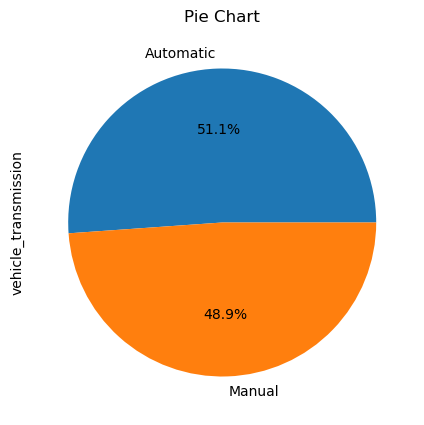

In [12]:
plt.figure(figsize=(5,5))
df['vehicle_transmission'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Pie Chart")
plt.show()

 Above Pie chart shows the out of 100%, 55.2% is manual and 44.8% is automatic.

#### TOP 5 Brand Car

In [13]:
band=df['brand'].value_counts()
sort=band.sort_values(ascending= False).head(5)
sort

Toyota      19795
Suzuki      17709
Honda       11443
Daihatsu     2370
Nissan       1268
Name: brand, dtype: int64

#### Count plot

In [14]:
df.head(5)

,brand,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,MG,MG HS 2021 for sale in Lahore,Petrol,used,MG,6000,2021.0,6525000.0,1490cc,Automatic
1,Toyota,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,68000,2012.0,1625000.0,1000cc,Manual
2,Honda,Honda City 2015 for sale in Lahore,Petrol,used,Honda,150000,2015.0,2550000.0,1300cc,Automatic
3,KIA,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,18000,2022.0,9000000.0,3500cc,Automatic
4,Toyota,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,110000,2015.0,3350000.0,1300cc,Automatic


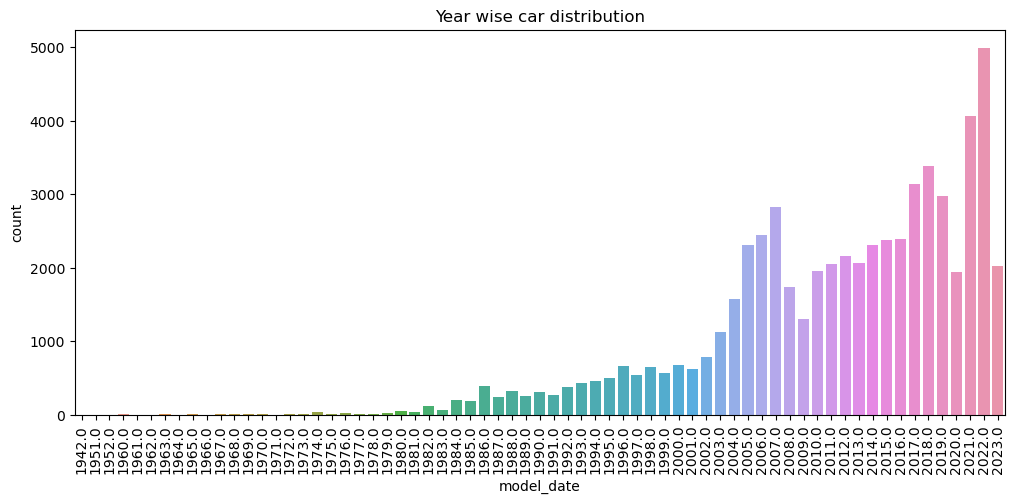

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='model_date')
plt.title("Year wise car distribution")
plt.xticks(rotation=90)
plt.show()

#### Below seaborn bar chart shows the price against fuel type. 

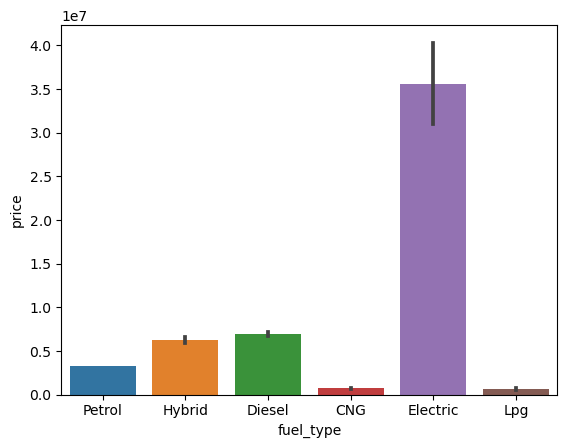

In [16]:
sns.barplot(x=df["fuel_type"],y=df["price"])
plt.show()

 Comparision : Electric car is expensive than other fule types

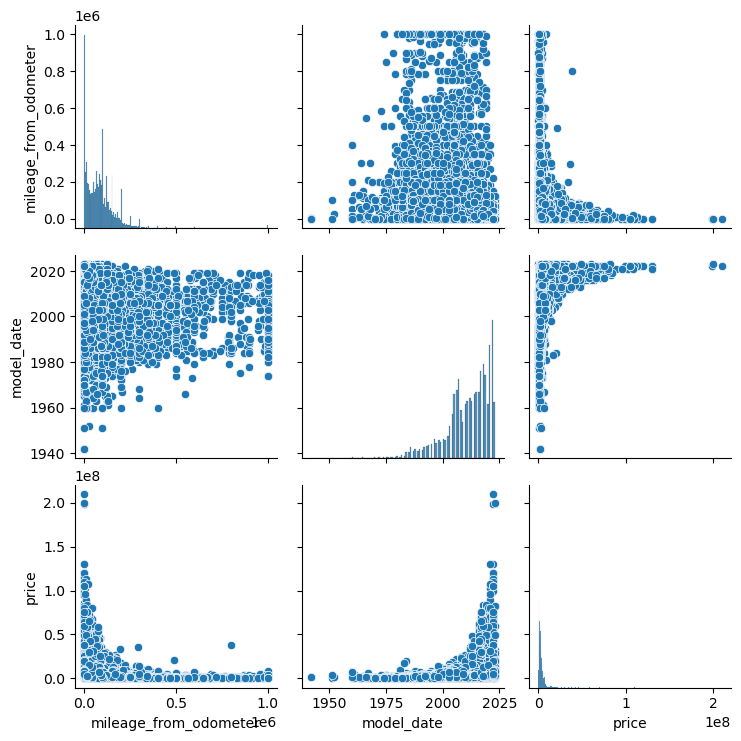

In [17]:
sns.pairplot(df)

#### Ploting the Boxplot or Whisker plot to find the outliers in the dataset

The whiskers are the two lines that run from the minimum to the lower quartile (the box's beginning) and then from the higher quartile (the box's end) to the maximum


1.Minimum Value

2.Lower Quartile

3.Median

4.Upper Quartile

5.Maximum Value

<Axes: xlabel='price'>

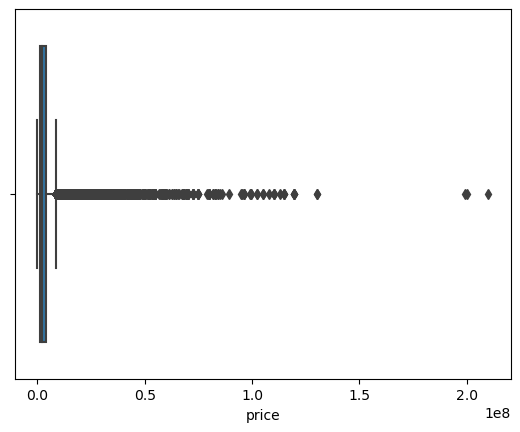

In [18]:
sns.boxplot(data=df,x="price")

Min:1780

Max:210000000

1st Quartile:1200000

Median:2300000

3rd Quartile:4100000

IQR=3rd Quartile-1st Quartile
IQR:2900000

UL:8450000

LL:-3150000

Above is the calculation to find the upper limit value and lower limit value based on that we remove the outliers from the dataset.

<Axes: xlabel='price'>

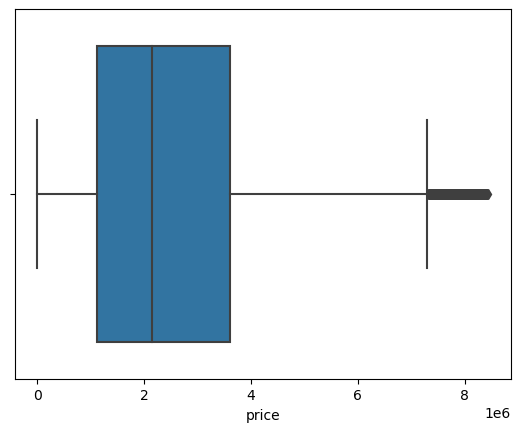

In [19]:
df=df[df["price"]<8450000]
sns.boxplot(data=df,x="price")

after using the upper limit value to remove the outliers there are still ourliers are exist in our dataset.
so remove this outliers through increasing the upperlimit values

<Axes: xlabel='price'>

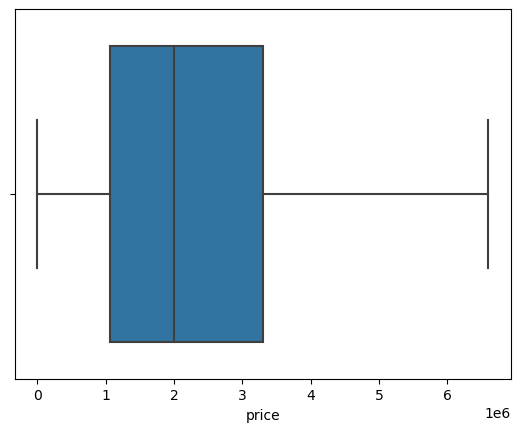

In [20]:
df=df[df["price"]<6600000]
sns.boxplot(data=df,x="price")

In [21]:
df

,brand,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,MG,MG HS 2021 for sale in Lahore,Petrol,used,MG,6000,2021.0,6525000.0,1490cc,Automatic
1,Toyota,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,68000,2012.0,1625000.0,1000cc,Manual
2,Honda,Honda City 2015 for sale in Lahore,Petrol,used,Honda,150000,2015.0,2550000.0,1300cc,Automatic
4,Toyota,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,110000,2015.0,3350000.0,1300cc,Automatic
5,Nissan,Nissan March 2004 for sale in Karachi,Petrol,used,Nissan,100000,2004.0,1050000.0,1000cc,Automatic
...,...,...,...,...,...,...,...,...,...,...
60099,KIA,KIA Picanto 2023 for sale in Karachi,Petrol,used,KIA,28,2023.0,3430000.0,1000cc,Automatic
60105,KIA,KIA Picanto 2022 for sale in Lahore,Petrol,used,KIA,10,2022.0,3350000.0,1000cc,Automatic
60106,Suzuki,Suzuki Swift 2022 for sale in Lahore,Petrol,used,Suzuki,10,2022.0,4750000.0,1200cc,Automatic
60107,Suzuki,Suzuki Wagon R 2018 for sale in Rawalpindi,Hybrid,used,Suzuki,15000,2018.0,3175000.0,660cc,Automatic


#### seperate the target and features columns.
 x is features column

y is target column

In [22]:
x=df.drop(["price"],axis=1)
y=df["price"]

#### Here we use ordinal encoder 
#### Ordinal encoder is work on multiple column

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

Columntransformer is used to perform the operations on multiple columns.

Remainder set as Passthrough: use to untransformed the columns which dtype is not object



In [24]:
ct=ColumnTransformer(transformers=[
    ("encoding",OrdinalEncoder(),list(x.select_dtypes("object").columns))
],remainder="passthrough")
x=ct.fit_transform(x)

In [25]:
x

array([[3.6000e+01, 4.7000e+03, 5.0000e+00, ..., 0.0000e+00, 6.0000e+03,
        2.0210e+03],
       [5.8000e+01, 1.2050e+04, 5.0000e+00, ..., 1.0000e+00, 6.8000e+04,
        2.0120e+03],
       [2.5000e+01, 2.3190e+03, 5.0000e+00, ..., 0.0000e+00, 1.5000e+05,
        2.0150e+03],
       ...,
       [5.7000e+01, 1.1458e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+01,
        2.0220e+03],
       [5.7000e+01, 1.1701e+04, 3.0000e+00, ..., 0.0000e+00, 1.5000e+04,
        2.0180e+03],
       [5.8000e+01, 1.4759e+04, 5.0000e+00, ..., 0.0000e+00, 1.6900e+05,
        2.0090e+03]])

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=45)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(lr.score(xtrain,ytrain))

0.6582836788672672


#### We use polynominal features to find best fit line of nonlinear data, create many forms to increase there degree.

In [28]:
# xtrain=ct.fit_transform(xtrain)
# xtest=ct.fit_transform(xtest)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
xtrain=poly.fit_transform(xtrain)
xtest=poly.fit_transform(xtest)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
r2_score(ytest,ypred)

0.8235412950341263

In [30]:
param_grid = {
    'max_depth': [None,5,8,9, 10, 20, 30,],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.score(xtrain,ytrain)